# Selecting the Right Threshold value using ROC Curve

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# ROC curve and auc Curve
from sklearn.datasets import make_classification 

In [2]:
from sklearn.model_selection import train_test_split
X,y = make_classification(n_samples=2000, n_classes=2,
                         weights=[1,1], random_state=1)

In [3]:
print(X.shape)
print(y.shape)

(2000, 20)
(2000,)


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [5]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Random Forest

In [6]:
## Applying Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
#model
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
#prediction on train
ytrain_pred = rf_model.predict_proba(X_train)
print("Rf train roc-auc:{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
# preddiction on test 
ytest_pred = rf_model.predict_proba(X_test)
print("Rf test roc-auc:{}".format(roc_auc_score(y_test,ytest_pred[:,1])))

Rf train roc-auc:1.0
Rf test roc-auc:0.9828579038242534


In [7]:
ytrain_pred = rf_model.predict_proba(X_train)
ytrain_pred

array([[0.21, 0.79],
       [0.99, 0.01],
       [0.99, 0.01],
       ...,
       [0.98, 0.02],
       [0.98, 0.02],
       [0.32, 0.68]])

In [8]:
print(ytest_pred)

[[0.05 0.95]
 [1.   0.  ]
 [0.06 0.94]
 ...
 [0.02 0.98]
 [0.92 0.08]
 [0.97 0.03]]


#Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train,y_train)
# Predcition on Train
ytrain_pred = log_classifier.predict_proba(X_train)
print("Logistic train roc-auc curver: {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))
# Predictio on Test
ytest_pred = log_classifier.predict_proba(X_test)
print("Logistic test roc-auc curve: {}".format(roc_auc_score(y_test,ytest_pred[:,1])))

Logistic train roc-auc curver: 0.986055506170199
Logistic test roc-auc curve: 0.989208699166085


#Adaboost Classifier

In [37]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train,y_train)

# Prediction on Train
ytrain_pred = ada_classifier.predict_proba(X_train)
print("Adaboost train roc-auc: {}".format(roc_auc_score(y_train,ytrain_pred[:,1])))

# Prediction on Test
ytest_pred = ada_classifier.predict_proba(X_test)
print("Adaboost test roc-auc :{}".format(roc_auc_score(y_test,ytest_pred[:,1])))

Adaboost train roc-auc: 0.9979235871146549
Adaboost test roc-auc :0.9807960765585394


# KNN CLassifier

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train,y_train)
# Prediction on train
ytrain_pred = knn_classifier.predict_proba(X_train)
print("Adaboost train roc-auc :{}".format(roc_auc_score(y_train,ytrain_pred[:,1])))

# Prediction on test
ytest_pred = knn_classifier.predict_proba(X_test)
print("Adaboost test roc-auc :{}".format(roc_auc_score(y_test,ytest_pred[:,1])))

Adaboost train roc-auc :0.9805269454674268
Adaboost test roc-auc :0.9443077036111827


#No we will focus on selecting the best threshold for maximum accuracy

In [39]:
pred = []
for model in [rf_model, log_classifier, ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred, axis=1).mean(axis=1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9852870945226112


In [40]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.97,0.991855,0.568678,1.0
1,0.00,0.000008,0.452677,0.0
2,0.96,0.963785,0.529893,0.8
3,0.96,0.735749,0.509372,0.8
4,0.60,0.764770,0.492850,0.4
...,...,...,...,...
655,0.01,0.004250,0.447648,0.0
656,0.09,0.000017,0.466408,0.0
657,0.98,0.971803,0.539953,0.8
658,0.05,0.006152,0.455522,0.4


In [41]:
final_prediction

0      0.882633
1      0.113171
2      0.813420
3      0.751280
4      0.564405
         ...   
655    0.115474
656    0.139106
657    0.822939
658    0.227919
659    0.112093
Length: 660, dtype: float64

In [43]:
# Calculate the ROC Curve
fpr , tpr , thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91273077, 0.91273077, 0.90541898, 0.90537369, 0.81337797,
       0.81285026, 0.80175586, 0.79894228, 0.78919243, 0.7884447 ,
       0.78685335, 0.78556826, 0.7185553 , 0.71850059, 0.70168956,
       0.6998772 , 0.67296816, 0.67274553, 0.6698942 , 0.66272292,
       0.65807902, 0.64073416, 0.62681665, 0.61881302, 0.61579966,
       0.6150757 , 0.58835628, 0.58485844, 0.5792391 , 0.57654677,
       0.56440483, 0.56147596, 0.54982201, 0.54469806, 0.53979658,
       0.53307772, 0.52879817, 0.49097267, 0.47964085, 0.47394204,
       0.43993358, 0.43496533, 0.43096711, 0.35844322, 0.35593429,
       0.24541049, 0.24352006, 0.21820972, 0.21693412, 0.21121038,
       0.20921979, 0.12264772, 0.12249627, 0.10276731])

In [45]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize = True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],axis =1)
accuracy_ls.columns = ["Tresholds", "Accuracy"]
accuracy_ls.sort_values(by="Accuracy", ascending = False, inplace = True)
accuracy_ls.head()

,Tresholds,Accuracy
41,0.434965,0.960606
40,0.439934,0.960606
42,0.430967,0.959091
39,0.473942,0.959091
37,0.490973,0.959091


In [46]:
accuracy_ls

,Tresholds,Accuracy
41,0.434965,0.960606
40,0.439934,0.960606
42,0.430967,0.959091
39,0.473942,0.959091
37,0.490973,0.959091
35,0.533078,0.959091
36,0.528798,0.957576
38,0.479641,0.957576
34,0.539797,0.957576
33,0.544698,0.957576


In [47]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr , color = "orange", label = "ROC")
    plt.plot([0,1],[0,1], color = "darkblue", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

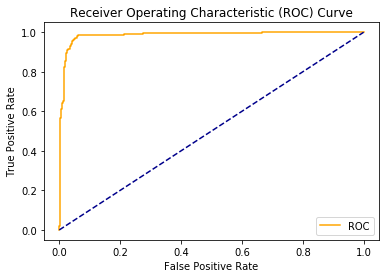

In [48]:
plot_roc_curve(fpr,tpr)